---
title: "Exploring Data"
format:
    html:
        page-layout: full
        code-fold: show
        code-copy: true
        code-tools: true
        code-overflow: wrap
---

Exploring data through visualizations is a key component in understanding the underlying datasets we are working with. The goal of my EDA implementation is to better understand viewer preferences and the factors that make movies "popular". EDA is a crucial step in the analytical process. I will be using Python with the following libraries: Pandas, Matplotlib, Seaborn

## Data Understanding ##

I am working with two main datasets, one that catpures user ratings of IMDB movies, and another that contains metadata for IMDB movies, which includes features like revenue, budget, genre, vote averages, vote counts, etc.

The metadata movie set is a comprehensive collection of film-related data. The dataset includes details such as a movie's affiliation with larger collections, allocated budget for production, assigned genres, official homepage URL, unique identifiers on both the dataset and IMDb, original language, title, and a brief overview of each film. The dataset also contains financial aspects, such as release date, revenue generated, and runtime. Taglines associated with each film and an indication of its video release status are also provided. The dataset incorporates valuable metrics for audience reception, including the average viewer rating ("vote_average") and the count of votes or ratings received ("vote_count"). These columns capture a comprehensive exploration of movie performance.

The user ratings dataset encompasses information related to movie ratings and user preferences. Each row represents a user's rating (rating_x) for a specific movie identified by its movieId. The title column provides the name of the movie, and the genres column details the genres associated with each film. Additionally, the userId column indicates the user who provided the rating. The avg_rating column  represents the average rating for the movie across all user ratings. This dataset serves as a resource for understanding user interactions with movies, their preferences, and potentially exploring patterns in movie ratings.

## Descriptive Statistics ##

Looking into the user ratings dataset, we can calculate the following numerical stats: mean, median, mode, standard deviation, and variance for user ratings. For categorical data, such as genres, we can explore various frequency distributions. We've incorporated bar charts to visually represent the distribution of ratings across different categories. This concise, tech-driven approach facilitates a rapid understanding of user preferences within the dataset.

In [17]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
os.chdir('/Users/samanthamoon/Desktop/DSAN 5000/dsan-5000-project-samjmoon/dsan-website/5000-website/data-cleaning')
movie_df = pd.read_csv('movie_eda.csv')
metadata_df = pd.read_csv('cleaned_metadata_movies.csv')

In [18]:
movie_df.head()

,movieId,title,genres,userId,rating_x,avg_rating
0,1,Toy Story (1995),Adventure,1,4.0,3.92093
1,1,Toy Story (1995),Animation,1,4.0,3.92093
2,1,Toy Story (1995),Children,1,4.0,3.92093
3,1,Toy Story (1995),Comedy,1,4.0,3.92093
4,1,Toy Story (1995),Fantasy,1,4.0,3.92093


<br>
Since the movie_df contains duplicate rows for movieId, I will create a new dataframe with no duplicates before conducting summary statistics. We will use the movie_df later for further analysis. 
<br>
<br>

In [19]:
movie_no_duplicates = movie_df.drop_duplicates(subset=['movieId'])
movie_no_duplicates.describe()

,movieId,userId,rating_x,avg_rating
count,9724.000000,9724.000000,9724.000000,9724.000000
mean,42245.024373,214.491670,3.298026,3.262448
std,52191.137320,199.585586,1.103966,0.869874
min,1.000000,1.000000,0.500000,0.500000
25%,3245.500000,33.000000,2.500000,2.800000
50%,7300.000000,135.000000,3.500000,3.416667
75%,76739.250000,387.000000,4.000000,3.911765
max,193609.000000,610.000000,5.000000,5.000000


The summary statistics on movieId and userId are essentially meaningless as they are only identifiers, but the statistics for column rating_x provides us with some insight on user feedback.

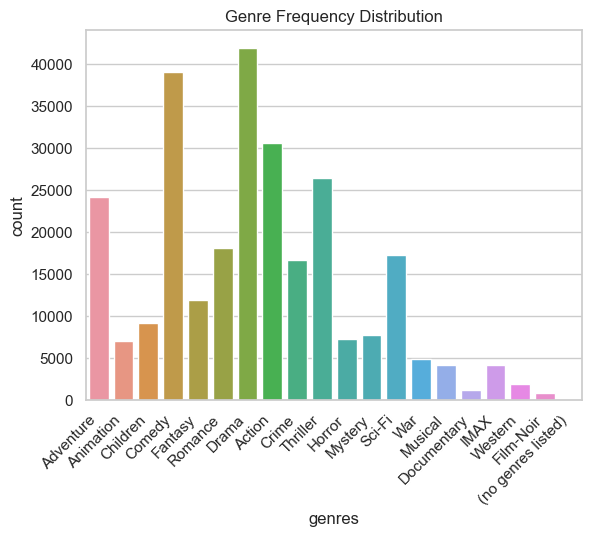

In [20]:
sns.countplot(x='genres', data=movie_df)
plt.xticks(rotation=45, ha='right') 
plt.title('Genre Frequency Distribution')
plt.show()

## Data Visualization ##

In exploring our movie rating dataset, we utilize visualizations like histograms, box plots, scatterplots, and heatmaps. These visuals allow us to understand the distribution of ratings, relationships between different features, and uncover potential trends in movie preferences. Histograms offer insights into how ratings are distributed, box plots highlight central tendencies and variations, scatterplots identify feature relationships, and heatmaps provide a visual overview of rating patterns. Through these visualizations, we simplify the complexity of our movie data, making it more accessible and enabling a quick and intuitive understanding of viewer preferences and trends.

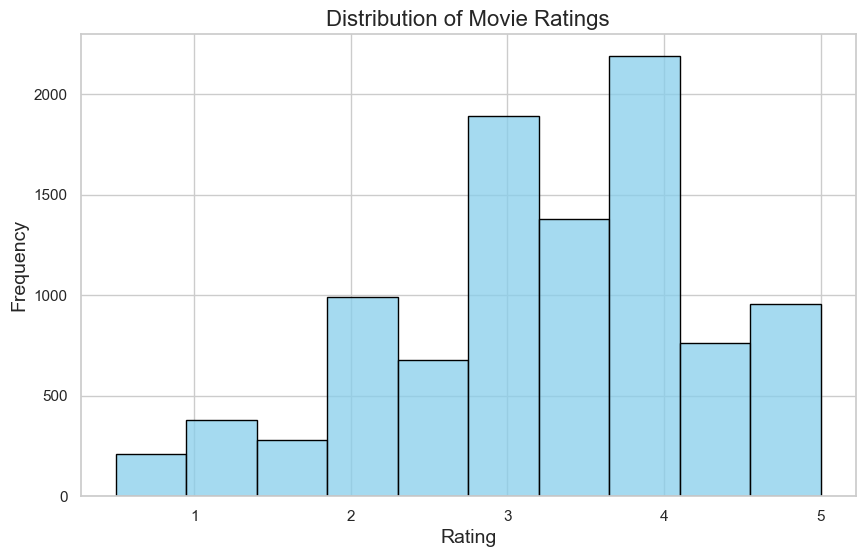

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(movie_no_duplicates['rating_x'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

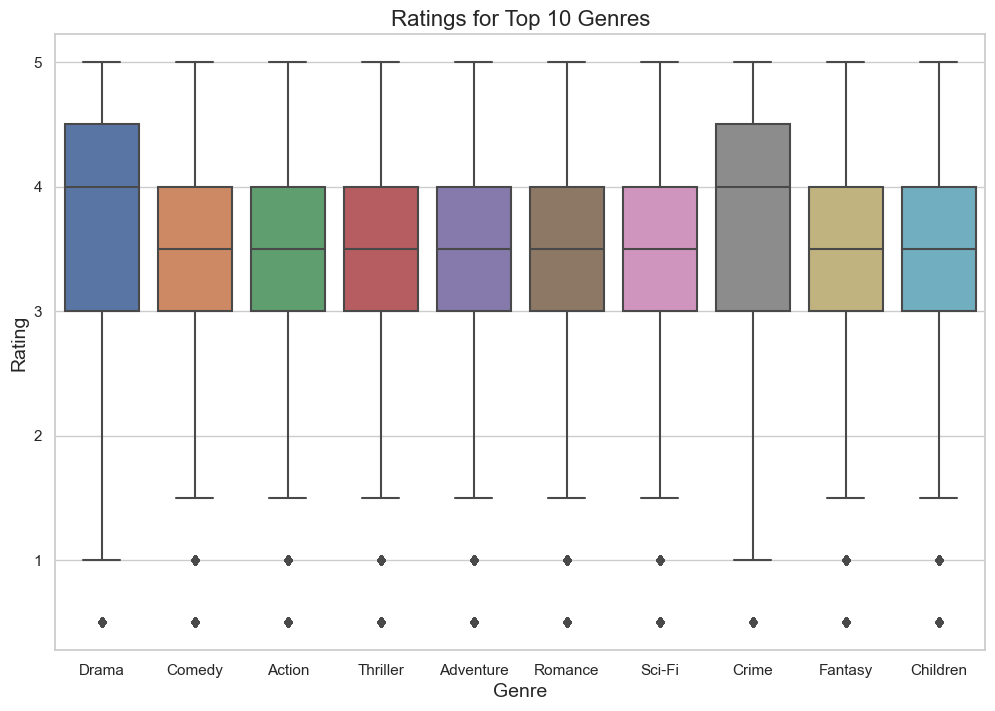

In [22]:
top_genres = movie_df['genres'].value_counts().head(10).index
movie_top_genres = movie_df[movie_df['genres'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='rating_x', data=movie_top_genres, order=top_genres)
plt.title('Ratings for Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()

From the above plot, we can observe that Drama and Crime genres have the highest median ratings.

### Metadata Dataset ###

We'll now explore the metadata movie dataset.

In [23]:
metadata_df.head()

,budget,genres,tmdbId,imdb_id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,30000000,"['Animation', 'Comedy', 'Family']",862.0,tt0114709,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844.0,tt0113497,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
2,0,"['Romance', 'Comedy']",15602.0,tt0113228,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0
3,16000000,"['Comedy', 'Drama', 'Romance']",31357.0,tt0114885,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,0,['Comedy'],11862.0,tt0113041,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0


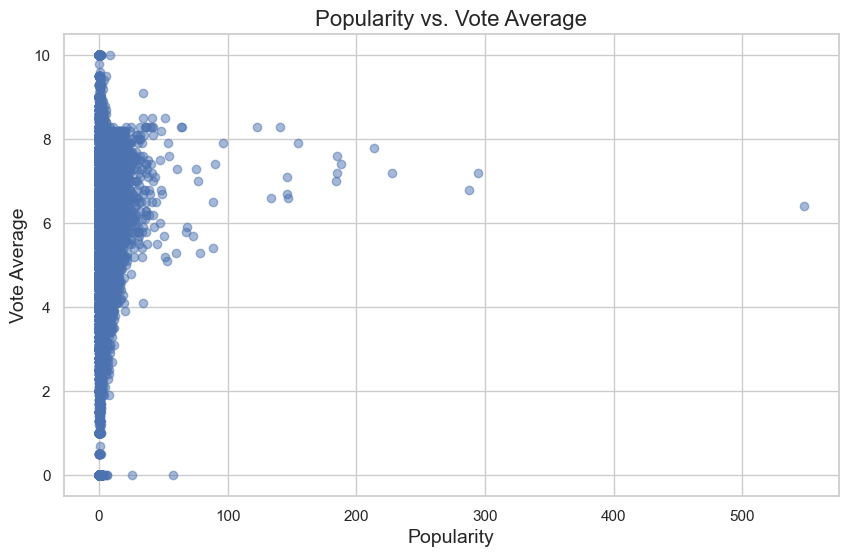

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(metadata_df['popularity'], metadata_df['vote_average'], alpha=0.5)
plt.title('Popularity vs. Vote Average', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)
plt.show()

From this visualization we can see that this dataset contains outliers in the popularity column. We will address this issue later.

## Correlation Analysis ##

Through the usage of correlation matrices and heatmaps, we can explore data relationship across the dataset. Positive correlations describe features that tend to increase/decrease together, offering valuable insights into potential patterns. Variables with low correlation possibly denote independent features in our dataset.

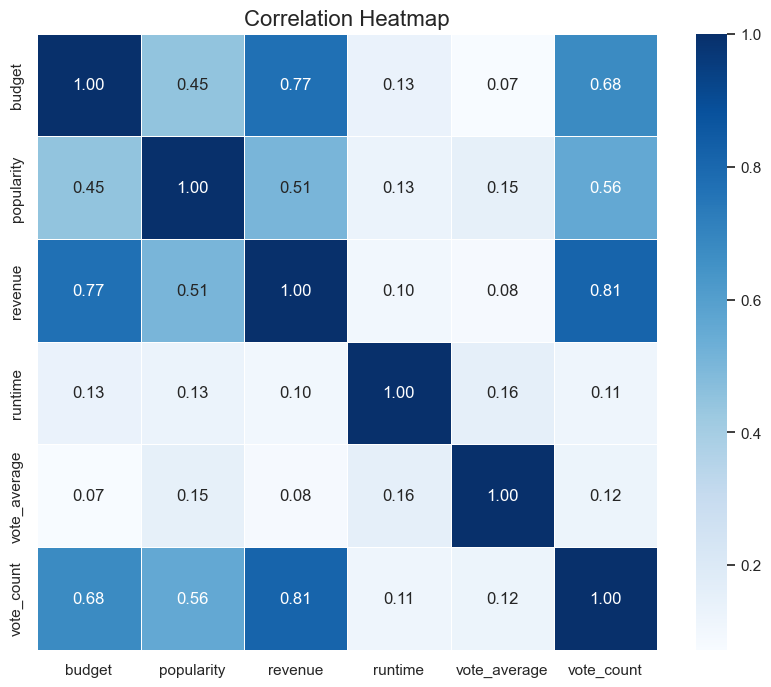

In [31]:
heatmap_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
correlation_matrix = metadata_df[heatmap_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Identifying Outliers ##

As we saw previously, there were outliers in the popularity column of the metadata dataframe. We will remove those outliers using the z-score method for outlier removal. We'll use a threshold of 3 to remove outlier points.

In [32]:
from scipy import stats
column = 'popularity'
z_scores = stats.zscore(metadata_df[column])
threshold = 3
df_no_outliers = metadata_df[(abs(z_scores) < threshold)]


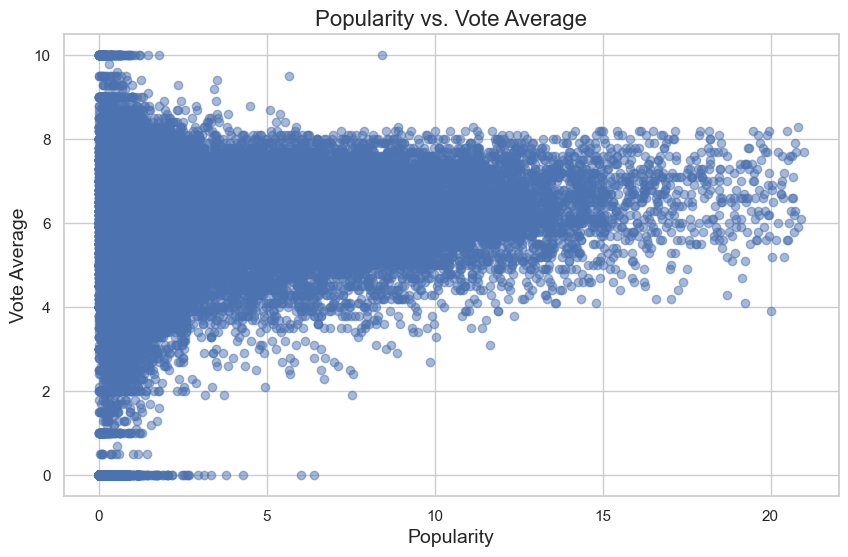

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['popularity'], df_no_outliers['vote_average'], alpha=0.5)
plt.title('Popularity vs. Vote Average', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)
plt.show()

After outlier removal, we see the popularity vs. vote average relationship more closely.

## Findings ##

After conducting EDA on the movie ratings dataset and the metadata dataset, I discovered relationships amongst various features. I discovered that Drama and Comedy genres were the most prevalent within the movie ratings data, and Drama and Crime genres have the highest rating averages. I then explored the metadata movie data through analyzing correlations between numerical features such as budget, revenue, popularity, runtime, vote average, and vote counts. I found the highest correlations between vote counts and revenue, revenue and budget, and budget and vote count. I removed outliers within the popularity column for later analysis. By exploring these two datasets, I've gained valuable insight to film data that can be used to conduct research on user preferences, movie trends, etc.